In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv("../Data/transcriptions_with_sex.csv")

In [6]:
data = pd.read_csv('../Data/data.csv', index_col=0)

In [8]:
# Infos sur l'âge : moyenne de 30 ans mais échantillon varié (std = 20)
(data['age'].dropna().astype(int)).describe()

count    154.000000
mean      30.435065
std       20.522242
min        1.000000
25%       13.000000
50%       27.500000
75%       45.750000
max       78.000000
Name: age, dtype: float64

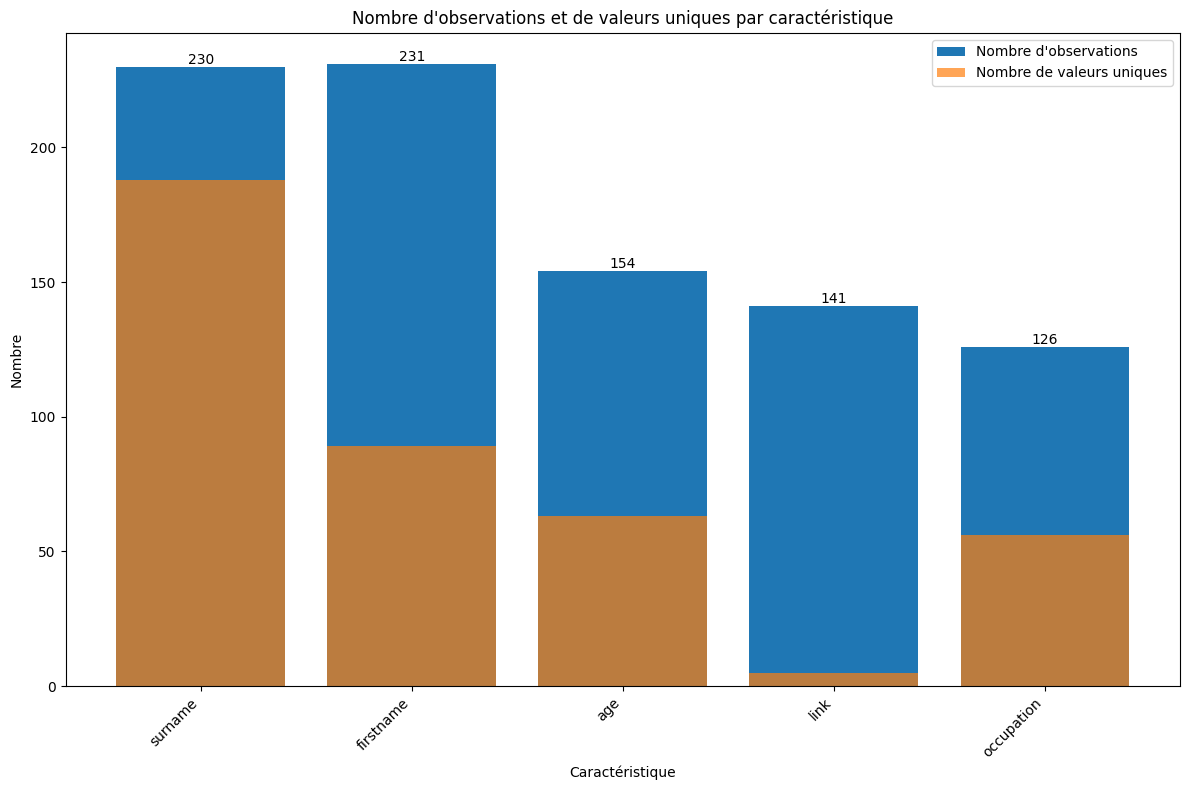

In [9]:
import matplotlib.pyplot as plt

# Colonnes de features
features = ['surname', 'firstname', 'age', 'link', 'occupation']

# Calcul du nombre d'observations par caractéristique
observations_count = data[features].count()

# Calcul du nombre de valeurs uniques par caractéristique
unique_values_count = data[features].nunique()

# Création du graphique à barres empilées
plt.figure(figsize=(12, 8))
observation_color = '#1f77b4'  # Bleu
unique_color = '#ff7f0e'       # Orange
# Tracé du nombre d'observations
observation_bars = plt.bar(range(len(features)), observations_count, label='Nombre d\'observations', color=observation_color)

# Tracé du nombre de valeurs uniques en utilisant le même axe y
unique_bars = plt.bar(range(len(features)), unique_values_count, label='Nombre de valeurs uniques', color=unique_color, alpha=0.7)

# Configuration des axes
plt.xlabel('Caractéristique')
plt.ylabel('Nombre')
plt.title('Nombre d\'observations et de valeurs uniques par caractéristique')
plt.xticks(range(len(features)), features, rotation=45, ha='right')

# Affichage du nombre exact d'observations au-dessus de chaque barre
for bar, obs_count in zip(observation_bars, observations_count):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), obs_count, ha='center', va='bottom')

plt.legend()

plt.tight_layout()
plt.show()


In [10]:
# Nb de valeurs manquantes
data['surname'].isna().sum(), data['firstname'].isna().sum(), data['age'].isna().sum(), data['link'].isna().sum(), data['occupation'].isna().sum()

(1, 0, 77, 90, 105)

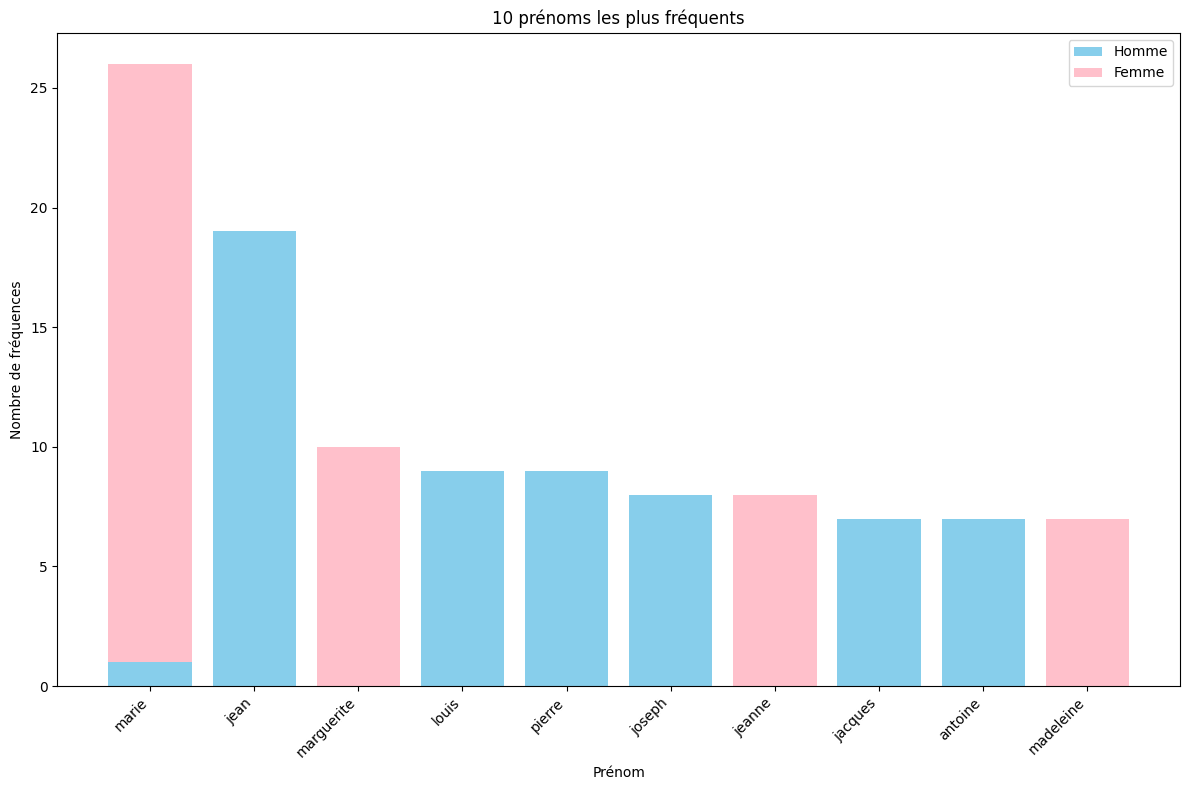

In [62]:
# Supposons que vous avez déjà chargé votre dataset et l'avez stocké dans un DataFrame appelé 'df'
# Calculer les 10 prénoms les plus fréquents
top_names = data['firstname'].value_counts().head(10).index.tolist()

# Créer un DataFrame pour stocker les résultats
top_names_df = pd.DataFrame(index=top_names, columns=['total', 'male', 'female'])

# Remplir le DataFrame avec le nombre d'occurrences pour chaque sexe
for name in top_names:
    total_count = data[data['firstname'] == name].shape[0]
    male_count = data[(data['firstname'] == name) & (data['sex'] == 'homme')].shape[0]
    female_count = total_count - male_count
    top_names_df.loc[name] = [total_count, male_count, female_count]

# Tracer l'histogramme
plt.figure(figsize=(12, 8))

plt.bar(top_names_df.index, top_names_df['male'], label='Homme', color='skyblue')
plt.bar(top_names_df.index, top_names_df['female'], bottom=top_names_df['male'], label='Femme', color='pink')

plt.title('10 prénoms les plus fréquents')
plt.xlabel('Prénom')
plt.ylabel('Nombre de fréquences')
plt.xticks(rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()


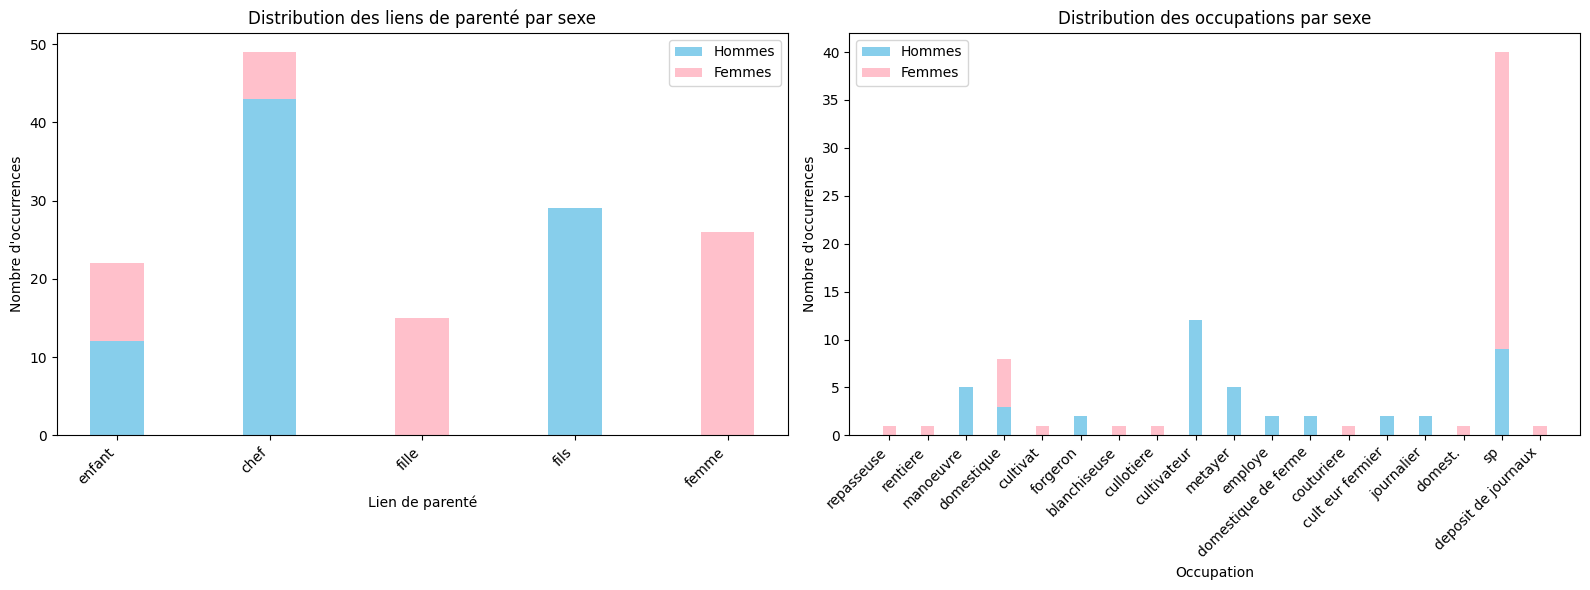

In [47]:
data_male = data[data['sex'] == 'homme']
data_female = data[data['sex'] == 'femme']

import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt

# Calcul de la distribution des occupations pour chaque sexe
occupation_distribution_male = data_male['occupation'].value_counts().head(10)
occupation_distribution_female = data_female['occupation'].value_counts().head(10)

link_distribution_male = data_male['link'].value_counts()
link_distribution_female = data_female['link'].value_counts()

# Assurer que les deux séries ont les mêmes catégories de liens de parenté
all_links = set(link_distribution_male.index) | set(link_distribution_female.index)

# Combiner les deux séries en un seul DataFrame
link_distribution = pd.DataFrame({'Hommes': link_distribution_male.reindex(all_links, fill_value=0),
                                  'Femmes': link_distribution_female.reindex(all_links, fill_value=0)})

# Assurer que les deux séries ont les mêmes catégories d'occupation
all_occupations = set(occupation_distribution_male.index) | set(occupation_distribution_female.index)

# Combiner les deux séries en un seul DataFrame
occupation_distribution = pd.DataFrame({'Hommes': occupation_distribution_male.reindex(all_occupations, fill_value=0),
                                        'Femmes': occupation_distribution_female.reindex(all_occupations, fill_value=0)})

# Créer une grille de sous-graphiques
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Graphique pour la distribution des liens de parenté
bar_width = 0.35
index_link = range(len(link_distribution))

axes[0].bar(index_link, link_distribution['Hommes'], bar_width, label='Hommes', color='skyblue')
axes[0].bar(index_link, link_distribution['Femmes'], bar_width, bottom=link_distribution['Hommes'], label='Femmes', color='pink')

axes[0].set_title('Distribution des liens de parenté par sexe')
axes[0].set_xlabel('Lien de parenté')
axes[0].set_ylabel('Nombre d\'occurrences')
axes[0].set_xticks(index_link)
axes[0].set_xticklabels(link_distribution.index, rotation=45, ha='right')
axes[0].legend()

# Graphique pour la distribution des occupations
index_occ = range(len(occupation_distribution))
axes[1].bar(index_occ, occupation_distribution['Hommes'], bar_width, label='Hommes', color='skyblue')
axes[1].bar(index_occ, occupation_distribution['Femmes'], bar_width, bottom=occupation_distribution['Hommes'], label='Femmes', color='pink')

axes[1].set_title('Distribution des occupations par sexe')
axes[1].set_xlabel('Occupation')
axes[1].set_ylabel('Nombre d\'occurrences')
axes[1].set_xticks(index_occ)
axes[1].set_xticklabels(occupation_distribution.index, rotation=45, ha='right')
axes[1].legend()

plt.tight_layout()
plt.show()



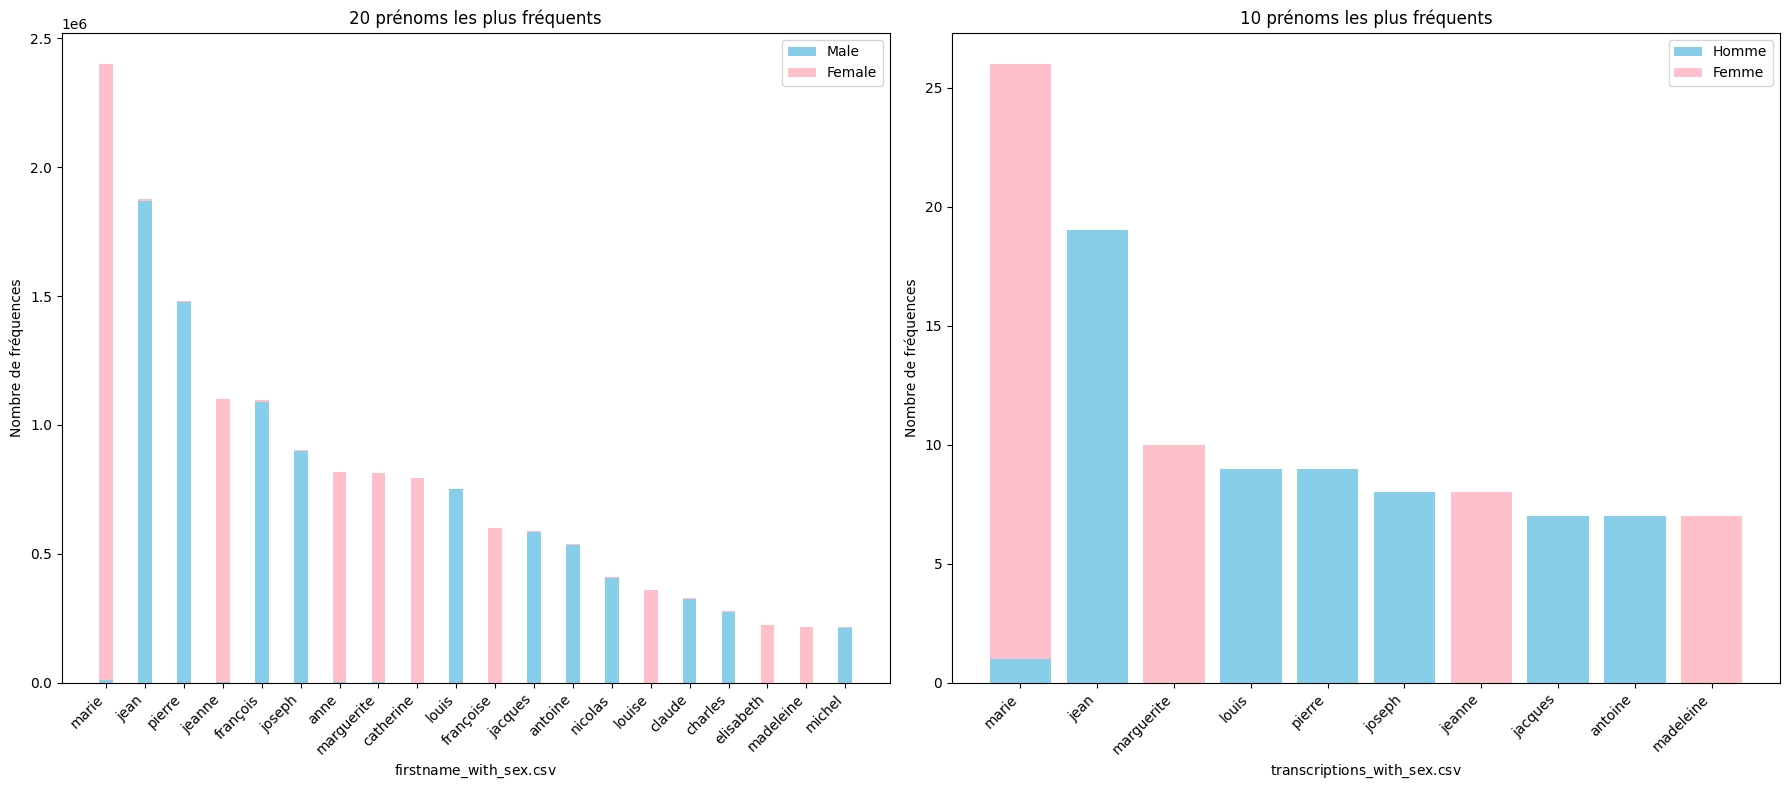

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Supposons que vous avez déjà chargé votre dataset et l'avez stocké dans un DataFrame appelé 'data'
# Calculer les 20 prénoms les plus fréquents
# stats_df_top20 = data['firstname'].value_counts().head(20).to_frame(name='total')
# stats_df_top20['male'] = data[data['sex'] == 'homme']['firstname'].value_counts().head(20)
# stats_df_top20['female'] = stats_df_top20['total'] - stats_df_top20['male']

# Créer le graphique à barres empilées pour les 20 prénoms les plus fréquents
plt.figure(figsize=(18, 8))
stats_df['total'] = stats_df['male'] + stats_df['female']
stats_df_top20 = stats_df.nlargest(20, 'total')
# Plot 1 - 20 prénoms les plus fréquents
plt.subplot(1, 2, 1)

bar_width = 0.35
index = range(len(stats_df_top20))

plt.bar(index, stats_df_top20['male'], bar_width, label='Male', color='skyblue')
plt.bar(index, stats_df_top20['female'], bar_width, bottom=stats_df_top20['male'], label='Female', color='pink')

plt.title('20 prénoms les plus fréquents')
plt.xlabel('firstname$\_$with$\_$sex.csv')
plt.ylabel('Nombre de fréquences')
plt.xticks(index, stats_df_top20['firstname'], rotation=45, ha='right')
plt.legend()

# Calculer les 10 prénoms les plus fréquents
top_names = data['firstname'].value_counts().head(10).index.tolist()

# Créer un DataFrame pour stocker les résultats
top_names_df = pd.DataFrame(index=top_names, columns=['total', 'male', 'female'])

# Remplir le DataFrame avec le nombre d'occurrences pour chaque sexe
for name in top_names:
    total_count = data[data['firstname'] == name].shape[0]
    male_count = data[(data['firstname'] == name) & (data['sex'] == 'homme')].shape[0]
    female_count = total_count - male_count
    top_names_df.loc[name] = [total_count, male_count, female_count]

# Plot 2 - 10 prénoms les plus fréquents
plt.subplot(1, 2, 2)

plt.bar(top_names_df.index, top_names_df['male'], label='Homme', color='skyblue')
plt.bar(top_names_df.index, top_names_df['female'], bottom=top_names_df['male'], label='Femme', color='pink')

plt.title('10 prénoms les plus fréquents')
plt.xlabel('transcriptions$\_$with$\_$sex.csv')
plt.ylabel('Nombre de fréquences')
plt.xticks(rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()


In [14]:
stats_df = pd.read_csv('firstname_with_sex.csv', delimiter = ';')

In [3]:
stats_df

,firstname,male,female
0,marie,10145,2390322
1,jean,1869615,6476
2,pierre,1475841,5047
3,jeanne,1765,1097397
4,françois,1089009,5951
...,...,...,...
6941,winnocq,10,0
6942,xyste,9,1
6943,zara,0,10
6944,zéraphin,10,0


In [4]:
stats_df['freq_moyenne'] = (stats_df['male'] + stats_df['female']) / 2

In [5]:
nb_prenoms_male = stats_df['male'].sum()
nb_prenoms_female = stats_df['female'].sum()

nb_prenoms_male, nb_prenoms_female

(14480397, 12470545)

In [6]:
top_prenoms_male = stats_df.nlargest(10, 'male')
top_prenoms_female = stats_df.nlargest(10, 'female')

top_prenoms_male, top_prenoms_female

(   firstname     male  female  freq_moyenne
 1       jean  1869615    6476      938045.5
 2     pierre  1475841    5047      740444.0
 4   françois  1089009    5951      547480.0
 5     joseph   897742    4246      450994.0
 9      louis   750498    2720      376609.0
 11   jacques   585567    2010      293788.5
 12   antoine   536089    2067      269078.0
 13   nicolas   408007    1463      204735.0
 15    claude   324134    4830      164482.0
 16   charles   276133     972      138552.5,
      firstname   male   female  freq_moyenne
 0        marie  10145  2390322     1200233.5
 3       jeanne   1765  1097397      549581.0
 6         anne   1479   816241      408860.0
 7   marguerite   1441   813859      407650.0
 8    catherine   1223   792448      396835.5
 10   françoise   1153   600167      300660.0
 14      louise    681   360914      180797.5
 17   elisabeth    353   224969      112661.0
 18   madeleine    424   217939      109181.5
 22    claudine    280   163711       81995.

In [7]:
len(stats_df[stats_df['male'] > 0])

4866

In [8]:
len(stats_df[stats_df['female'] > 0])

5137

In [9]:
stats_df['total'] = stats_df['male'] + stats_df['female']
stats_df_top20 = stats_df.nlargest(20, 'total')

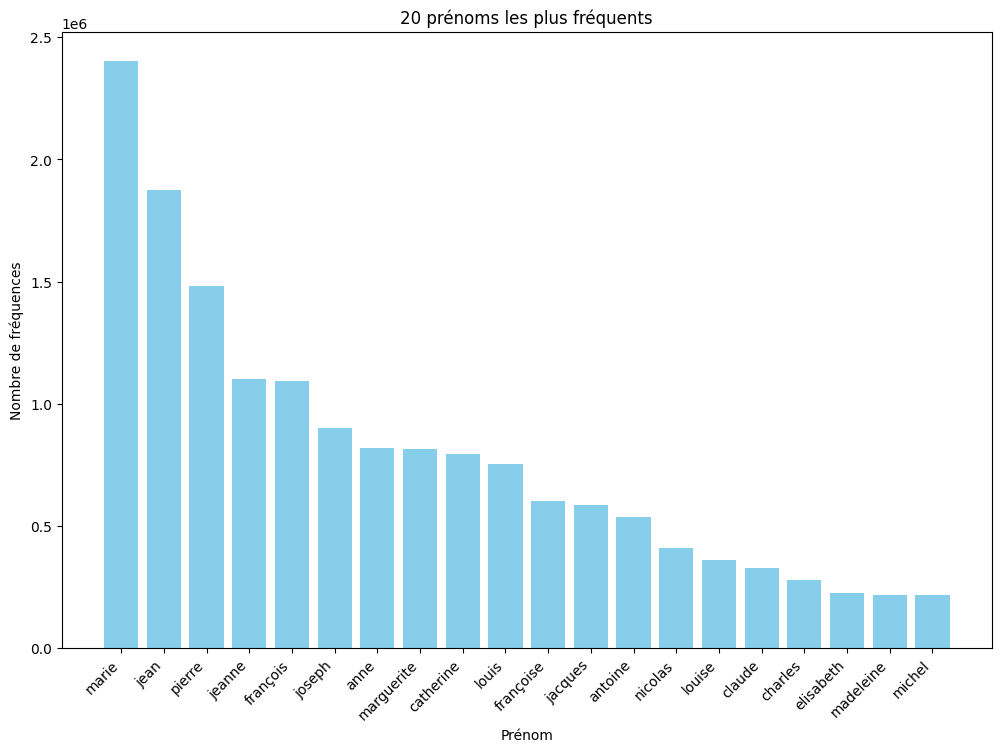

In [10]:
# Créer le graphique à barres
plt.figure(figsize=(12, 8))
plt.bar(stats_df_top20['firstname'], stats_df_top20['total'], color='skyblue')
plt.title('20 prénoms les plus fréquents')
plt.xlabel('Prénom')
plt.ylabel('Nombre de fréquences')
plt.xticks(rotation=45, ha='right')
plt.show()

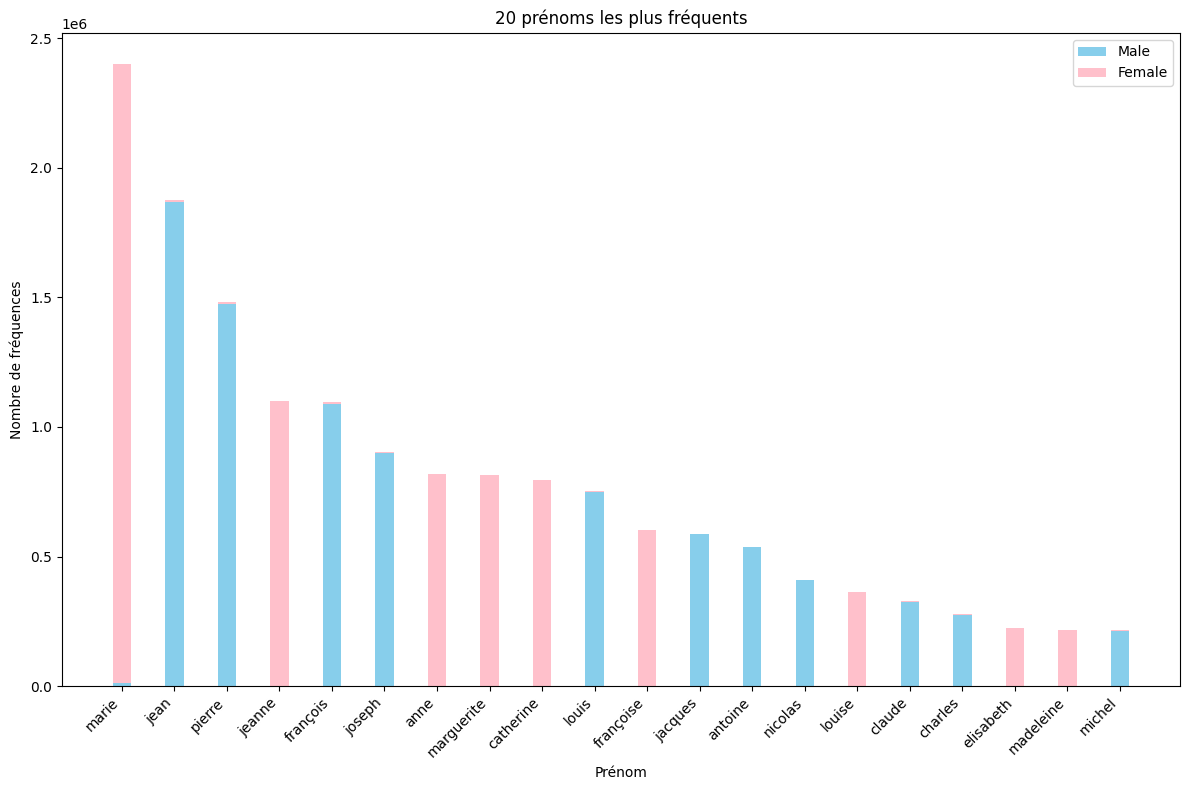

In [11]:
# Créer le graphique à barres empilées
plt.figure(figsize=(12, 8))
bar_width = 0.35
index = range(len(stats_df_top20))

stats_df['total'] = stats_df['male'] + stats_df['female']
stats_df_top20 = stats_df.nlargest(20, 'total')

plt.bar(index, stats_df_top20['male'], bar_width, label='Male', color='skyblue')
plt.bar(index, stats_df_top20['female'], bar_width, bottom=stats_df_top20['male'], label='Female', color='pink')

plt.title('20 prénoms les plus fréquents')
plt.xlabel('Prénom')
plt.ylabel('Nombre de fréquences')
plt.xticks(index, stats_df_top20['firstname'], rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
stats_df_top20

,firstname,male,female,freq_moyenne,total
0,marie,10145,2390322,1200233.5,2400467
1,jean,1869615,6476,938045.5,1876091
2,pierre,1475841,5047,740444.0,1480888
3,jeanne,1765,1097397,549581.0,1099162
4,françois,1089009,5951,547480.0,1094960
5,joseph,897742,4246,450994.0,901988
6,anne,1479,816241,408860.0,817720
7,marguerite,1441,813859,407650.0,815300
8,catherine,1223,792448,396835.5,793671
9,louis,750498,2720,376609.0,753218


In [13]:
majority_male_count = (stats_df['male'] > stats_df['female']).sum()
majority_female_count = (stats_df['female'] > stats_df['male']).sum()

print("Nombre de prénoms à majorité masculine :", majority_male_count)
print("Nombre de prénoms à majorité féminine :", majority_female_count)

Nombre de prénoms à majorité masculine : 3417
Nombre de prénoms à majorité féminine : 3519


In [14]:
stats_df['diff_freq'] = abs(stats_df['male'] - stats_df['female'])
prenoms_mixtes = stats_df[stats_df['diff_freq'] < 10000]
stats_df['weighted_diff'] = stats_df['diff_freq'] / (stats_df['male'] + stats_df['female'])

In [15]:
prenoms_mixtes

,firstname,male,female,freq_moyenne,total,diff_freq
140,camille,15636,7307,11471.5,22943,8329
220,hyacinthe,7295,4628,5961.5,11923,2667
221,modeste,3430,8477,5953.5,11907,5047
250,philippine,34,9978,5006.0,10012,9944
251,séraphine,23,9818,4920.5,9841,9795
...,...,...,...,...,...,...
6941,winnocq,10,0,5.0,10,10
6942,xyste,9,1,5.0,10,8
6943,zara,0,10,5.0,10,10
6944,zéraphin,10,0,5.0,10,10


In [16]:
stats_df['weighted_diff'] = stats_df['diff_freq'] / (stats_df['male'] + stats_df['female'])
prenoms_mixtes_filtered = stats_df[(stats_df['weighted_diff'] > 0.3) & (stats_df['weighted_diff'] < 0.7)]

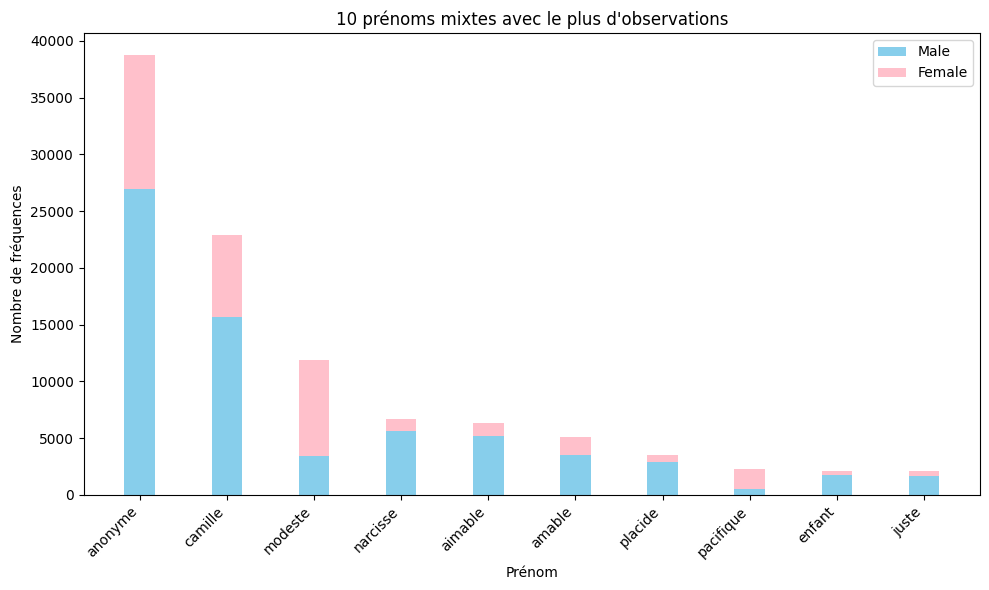

In [17]:
prenoms_mixtes_top10 = prenoms_mixtes_filtered.nlargest(10, 'total')

# Créer le graphique à barres empilées
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(prenoms_mixtes_top10))

plt.bar(index, prenoms_mixtes_top10['male'], bar_width, label='Male', color='skyblue')
plt.bar(index, prenoms_mixtes_top10['female'], bar_width, bottom=prenoms_mixtes_top10['male'], label='Female', color='pink')

plt.title('10 prénoms mixtes avec le plus d\'observations')
plt.xlabel('Prénom')
plt.ylabel('Nombre de fréquences')
plt.xticks(index, prenoms_mixtes_top10['firstname'], rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()